## Learning Objectives 

By the end of today's class, you should be able to...

- Recall and apply Linear Regression concepts from QL 1.1

- Discern how to obtain the best slope and intercept using [sklearn](https://scikit-learn.org/stable/)

- Evaluate the linear regression model

## Review of Linear Regression

- We want to present the relationship between two variables linearly
    - For example, recall the [example relationship between running distance and drinking water](https://github.com/Make-School-Courses/QL-1.1-Quantitative-Reasoning/blob/master/Final_Project/Final_Project.ipynb)

- In _regression_, we are interested in predicting a scalar-valued target, such as the price of a stock.

- By _linear_, we mean that the target must be predicted as a linear function of the inputs

## Simple Linear Regression 

<img src="Images/lreg_1.png" width="600" height="600">


### Question to the Class: What elements are present in the graph shown above?

<!-- The black dots are the observed values of x and y, The blue line is our prediction, The red lines are the errors, which are the distances between the observed values and the prediction. -->

## Sklearn

In QL, we did a lot of manual calculation to find what we needed. Today, we will learn how to use the sklearn library to do a lot of this calculation for us!

### Activity

- On your own, take 5 minutes to read through the [Getting Started](https://scikit-learn.org/stable/getting_started.html) guide from sklearn.


## Activity: 

We're going to revisit the example from QL with runners and water. You can assume that you are given the following data:

- Distance that a runner has run (in Miles)
- The amount of water that they drink (in Liters)

**Get in groups of 3 to complete the following activity**

## Given the below data, complete the following:

- Plot the scatter of distance versus water that consumed  
- Find the best line that describes this relationship
- Plot the best line that you found

**Hint:** [Matplotlib](https://matplotlib.org/api/pyplot_api.html)

In [6]:
import numpy as np

# Distance run in miles
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Amount of water consumed in liters
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

Text(0, 0.5, 'Water Drinks (Litre)')

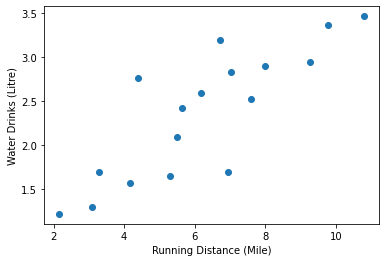

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

## Reshape your data when passing to sklearn:

In [9]:
# Passing 1-arrays as data is deprecated. Because of this,
# we must reshape our data using X.reshape(-1, 1) since our data has a single feature
print(X.reshape(-1, 1))

[[ 3.3  ]
 [ 4.4  ]
 [ 5.5  ]
 [ 6.71 ]
 [ 6.93 ]
 [ 4.168]
 [ 9.779]
 [ 6.182]
 [ 7.59 ]
 [ 2.167]
 [ 7.042]
 [10.791]
 [ 5.313]
 [ 7.997]
 [ 5.654]
 [ 9.27 ]
 [ 3.1  ]]


## Activity: Obtain the best slope and intercept for the given data using sklearn

**Hints:** The following documentation will be useful:
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- Review the `fit` method in the above documentation
- Review the `Attributes` in the above documentation to see where to find the best slope and intercept
- Remember to reshape your data!

In [3]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()

lr_reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1))

print(lr_reg.coef_)

print(lr_reg.intercept_)

[[0.25163494]]
[0.79880123]


## Question: 

- Use the code you wrote above to predict how much water a runner will drink if they run for 5 miles

In [4]:
lr_reg.predict([[5.0]])

array([[2.05697595]])

## Question: what are the metrics in order to evaluate Regression Model?

1 - Mean-Squared-Error (MSE)

2- R-Squared: is a number between 0 to 1, close to one means better model

## Question: 

- What is the mean-squared-error of our Linear Regression Model?

**Hints:**

- Given the slope ($w_1$) and intercept ($w_0$), we can use the following formula to find the mean-square-error (MSE):
    - $MSE = f(w_1, w_0)= \frac{1}{N} \sum_{i=0}^{N-1} (w_1x[i] + w_0 - y[i])^2$
- How could the map function help you find `y_predicted`?

0.15385767404191164


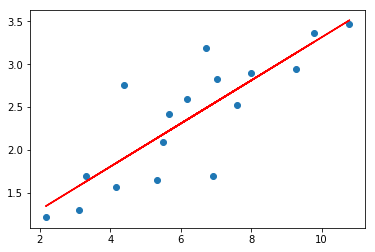

In [7]:
y_predicted = list(map(lambda x: 0.25163494*x + 0.79880123, X))
plt.scatter(X, Y)
plt.plot(X, y_predicted ,'r')
error = sum([ (i-j)**2 for i, j in zip(Y, y_predicted) ]) / len(Y)
print(error)

## Activity: How much companies' sales would be based on their product advertisement?

- We have a dataset of 200 companies, comprised of the top 150 companies, and the bottom 50 companies.

- The top companies (150) spent money to advertise their product on TV, radio and newspaper

- Based on their advertisments, they have calculated the sale that they had

- For the bottom companies (50), they want to have an estimation for the following: **if they spend X dollar, Y dollar and Z dollar on TV, radio and newspaper, respectively, how much would their predicted sales be?**

- We will use the top 150 companies in our dataset to train the model, and the bottom 50 companies to check that the model is working correctly

**In your group of 3**, use the [Advertising](Datasets/Advertising.csv) dataset and the starter code below to get started:

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.read_csv("Advertising.csv")
feature_cols = ["TV", "radio", "newspaper"]

# Use the top 150 companies to train the Linear Regression Model
X_train = df[feature_cols][:150]
Y_train = df.sales[:150]

# TODO: Instansiate the model (Linear Regression) and train it

# TODO: Predict the botton 50 companies' sales

### Solution

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.read_csv("Advertising.csv")
feature_cols = ["TV", "radio", "newspaper"]

# Use the top 150 companies to train the Linear Regression Model
X_train = df[feature_cols][:150]
Y_train = df.sales[:150]

# Instansiate the model (Linear Regression) and train it
print("Generating a linear regression on the top 150 companies (first one)")
sales_reg = LinearRegression()
sales_reg.fit(X_train, Y_train)

print("Printing the coefficient and y intercept of our first 150 sales")
print(sales_reg.coef_)
print(sales_reg.intercept_)

# Predict the botton 50 companies' sales
X_test = df[feature_cols][-50:]
Y_test = df.sales[-50:]
print("Predicting the sales of the bottom 50 companies (last ones)")
print(sales_reg.predict(X_test))

print(sales_reg.score(X_test, Y_test))
print(r2_score(Y_test, sales_reg.predict(X_test)))

Generating a linear regression on the top 150 companies (first one)
Printing the coefficient and y intercept of our first 150 sales
[ 0.04700012  0.17993257 -0.00140273]
3.0297667962936856
Predicting the sales of the bottom 50 companies (last ones)
[18.67186188 10.15990172 16.48950045 18.17132726 15.63964047  5.30168953
 15.19930681 10.27021058 10.15577653 12.48190724 14.35100299 13.43010832
 15.10545883 17.32542469 11.17561481 14.54411372 10.60623457 13.6578278
 17.31920373 18.29020846  7.44118029 14.4553876   7.54376735 12.20415315
 14.07598825 24.7841683  20.11008458 12.38328494 16.41529992 12.58762415
 10.84616747 14.23249384  6.65512798 24.18338541 18.74887883 20.75225663
  9.92682913 17.15002463 18.96767352  6.05302918 12.27336433  8.51313117
  4.53156602 18.42150484 16.46286778  5.47156415  8.32748549 13.01318332
 23.82330766 15.4737108 ]
0.8963519785440214
0.8963519785440214


### Question: If a new company spends  100, 100, and 20 dollars on TV, radio and newspaper, respectively on advertising, how much sales would you predict they have?

You should only need 1 line of code to find the answer!

In [9]:
sales_reg.predict([[100, 100, 20]])

array([25.69498118])

## Resources

- [A beginner’s guide to Linear Regression in Python with Scikit-Learn](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)
- [Sklearn User Guide](https://scikit-learn.org/stable/user_guide.html)
- [Linear Regression Example with Sklearn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)